<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/04_DataScience_And_Visualization/blob/main/06_DataScience_VisualizationMedicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science: Visualizing data for health and medicine

In this course, we will see how to use Data Science to understand data from health and medicine. Here, our focus will be on how to visualize and show important aspects of the data. We will learn more about some important parameters of a disease, and understand how these parameters evolve. Also, we will show how to join different datasets to make your analysis more rich. 

Initially, we will use data from John Hopkins GitHub. First, let's import it:

In [205]:
import pandas as pd

covid19_cases  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv') 
covid19_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [206]:
display(covid19_cases.head( ))
display(covid19_deaths.head( ))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179835,180086,180122,180174,180259,180347,180419,180520,180584,180615
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276012,276048,276081,276101,276101,276101,276221,276221,276310,276342
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265864,265870,265873,265873,265877,265884,265887,265889,265889,265889
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,42894,43067,43067
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99527,99761,99761,99761,99761,99761,99761


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7699,7699,7701,7701,7701,7705,7707,7708,7708,7708
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


So, our data has information about the cumulative number of cases and deaths for each day, starting at 01/22/2020. 

So, we know that the spread of Covid-19 started in China. Today, how does the number of cases in China compares to the number of cases in all other countries? 

Let's try to visualize this.

In [207]:
is_china = covid19_cases['Country/Region'] == 'China'

In [208]:
covid19_cases_china = covid19_cases[is_china]
covid19_cases_other = covid19_cases[~is_china]

In [209]:
display(covid19_cases_china.head( ))
display(covid19_cases_other.head( ))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,3310,3330,3344,3352,3368,3382,3382,3401,3410,3410
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,711,711,711,711,711,712,712,713,713,713
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,3220,3232,3247,3251,3258,3262,3262,3271,3285,3285
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,681,681,681,681,681,681,681,681,681,681


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179835,180086,180122,180174,180259,180347,180419,180520,180584,180615
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276012,276048,276081,276101,276101,276101,276221,276221,276310,276342
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265864,265870,265873,265873,265877,265884,265887,265889,265889,265889
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,42894,43067,43067
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99527,99761,99761,99761,99761,99761,99761


Note that we have multiple entries where 'Country/Region' == 'China', because we have different provinces/states. Now, let's draw our bar plot:

In [210]:
n_cases_china = covid19_cases_china.iloc[:, -1].sum( )
n_cases_other = covid19_cases_other.iloc[:, -1].sum( )

<BarContainer object of 2 artists>

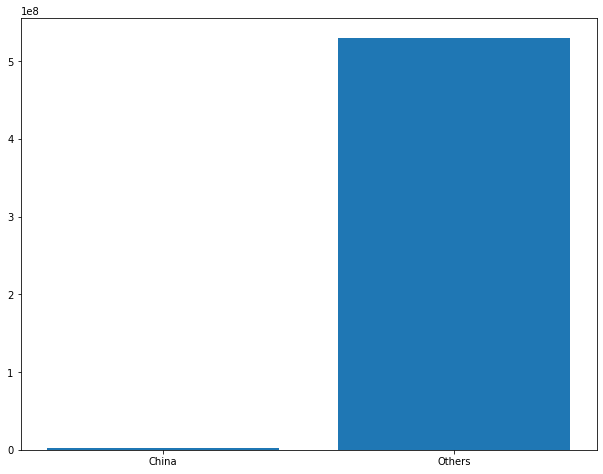

In [211]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 6))
axes = fig.add_axes([0, 0, 1, 1])

axes.bar(['China', 'Others'], [n_cases_china, n_cases_other])

# Using time series to understand the evolution of the disease

Now that we are 2 years into the Covid-19 outbreak, the number of cases in other countries is much higher than the number of cases in China. Now, let's try another thing. Let's plot a lineplot to show how the number of cases evolved in China and other countries:

In [212]:
cases_china_evol = covid19_cases_china.sum( ).to_frame( ).iloc[4:, :].reset_index( )
cases_other_evol = covid19_cases_other.sum( ).to_frame( ).iloc[3:, :].reset_index( )

cases_china_evol.columns = ['Day', 'Cases']
cases_other_evol.columns = ['Day', 'Cases']

cases_china_evol['Country'] = 'China'
cases_other_evol['Country'] = 'Others'

cases_evol = cases_china_evol.append(cases_other_evol)
cases_evol.Day = pd.to_datetime(cases_evol.Day)
cases_evol.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


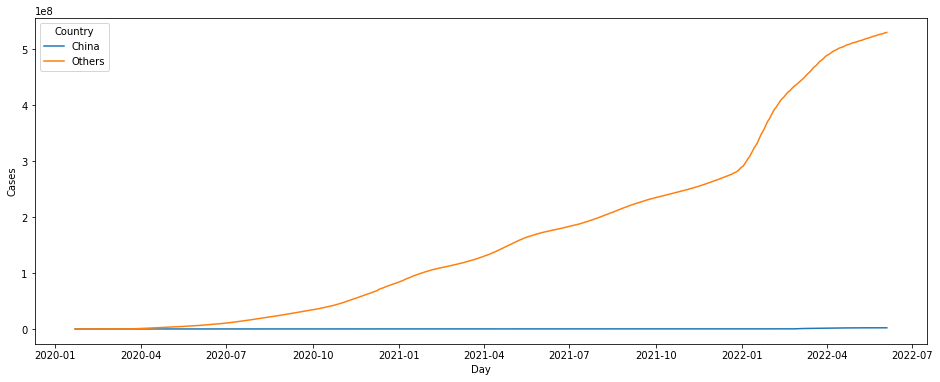

In [213]:
import seaborn as sns

fig = plt.figure(figsize = (16, 6))
sns.lineplot(x = 'Day', y = 'Cases', hue = 'Country', data = cases_evol)

Note that, due to the axis limits, it is hard to get the number of cases in China. However, let's try to see data until April 2020:

(0.0, 1000000.0)

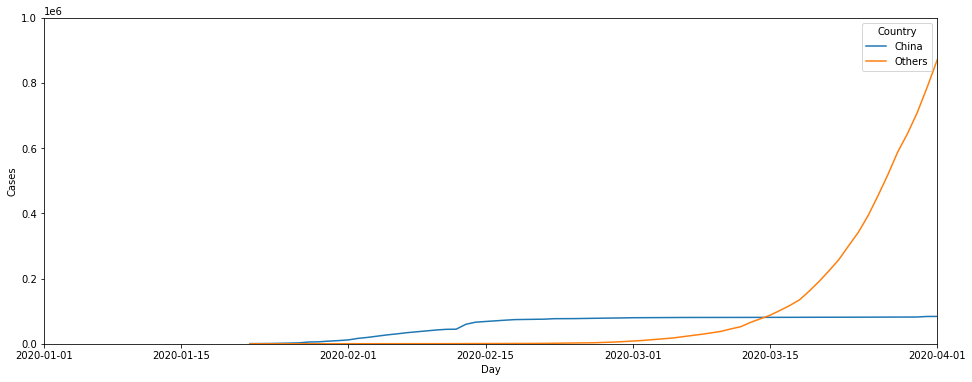

In [214]:
import datetime

fig = plt.figure(figsize = (16, 6))
ax = sns.lineplot(x = 'Day', y = 'Cases', hue = 'Country', data = cases_evol)

ax.set_xlim(datetime.datetime(2020, 1, 1), datetime.datetime(2020, 4, 1))
ax.set_ylim([0, 1e6])

We see that China started with far more cases. However, the number of cases soon stabilized in the country while, in the other countries, the number of cases increased steeply. After 2020-03-15, the number of cases in the rest of the world surpassed the number of cases in China.

However, the stabilization happens much sooner in China. Let's see a graph for the daily new cases:

In [215]:
cases_china_evol['New'] = cases_china_evol.Cases.diff( )
cases_other_evol['New'] = cases_other_evol.Cases.diff( )

cases_evol = cases_china_evol.append(cases_other_evol)
cases_evol.Day = pd.to_datetime(cases_evol.Day)
cases_evol.reset_index(drop = True, inplace = True)

cases_evol.head( )

,Day,Cases,Country,New
0,2020-01-22,548,China,NaN
1,2020-01-23,643,China,95
2,2020-01-24,920,China,277
3,2020-01-25,1406,China,486
4,2020-01-26,2075,China,669


(0.0, 20000.0)

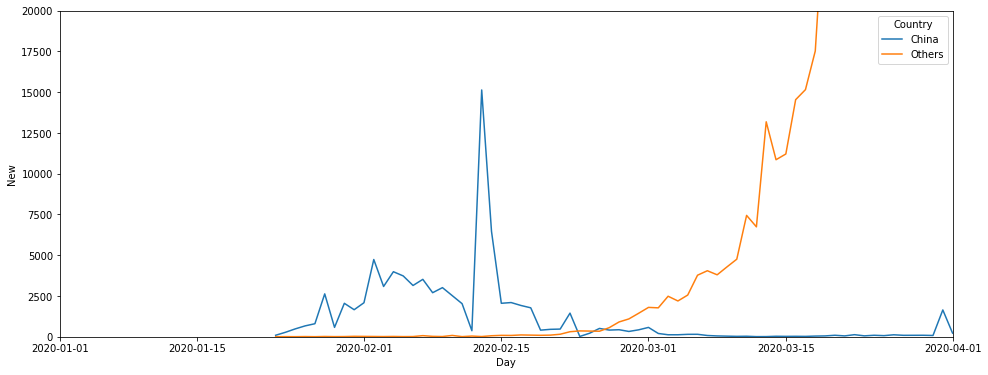

In [216]:
fig = plt.figure(figsize = (16, 6))
ax = sns.lineplot(x = 'Day', y = 'New', hue = 'Country', data = cases_evol)

ax.set_xlim(datetime.datetime(2020, 1, 1), datetime.datetime(2020, 4, 1))
ax.set_ylim([0, 2e4])

In fact, after 2020-03-01, the number of daily new cases in China was very low, while the number of daily new cases in the rest of the world increased very rapidly. 

Note that, depending on the graph we show, we pass an information to the viewer. Does it actually make sense to compare cases in a single country (China) with the cases in all others? Isn't it actually expected that the number of cases in the other countries is higher? At the same time, extreme comparisons can show us very important information. Why did China stabilized so well the infection? What can the other countries learn with its experience?

# Grabbing more information from other sources

Now, let's get more data from other source. Since we want information from Covid, we can get information from different sources, such as epidemiologic reports. Also, we can add other important features to our data set which are not directly related to Covid-19.

For instance, to evaluate the incidence rate, we need to grab the exposed population from each country. We can get the total population from a simple search, and evaluate the incidence rate by:

In [217]:
n_cases_china = covid19_cases[covid19_cases['Country/Region'] == 'China'].iloc[:, -1].sum( )
pop_china = 1449947840 # from a simple search on google

incidence_rate = n_cases_china/pop_china
print(f'Incidence rate: {round(incidence_rate*100,2)} %')

Incidence rate: 0.14 %


So, 0.14% of the entire china population got infected with Covid-19 since the start of the outbreak. Actually, it is more common to show the incidence rate per a number of people. For instance:

In [218]:
print(f'Incidence rate: {round(incidence_rate*100000,0)} per 100,000 habitants')
print(f'which means that, in a population of 100,000 \nChina residents, {round(incidence_rate*100000,0)} got infected')

Incidence rate: 145.0 per 100,000 habitants
which means that, in a population of 100,000 
China residents, 145.0 got infected


Note that we should check if the population we are using is the population exposed to the disease. Also, it is not simple to check on google and grab the population for every country. In fact, we can just grab this population from other well-known dataset. For instance, we can get the total population by the UN world population dataset:

In [219]:
population_un = pd.read_csv('WPP2019_TotalPopulationBySex.csv')

In [220]:
population_un

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


Note that, in this data set, we have information about the population of each country for different years (and also projections for the future). First, let's get the population in the year of 2022:

In [221]:
population_un.query('Time == 2022')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
72,4,Afghanistan,2,Medium,2022,2022.5,20900.542,19853.843,40754.385,62.424
153,4,Afghanistan,3,High,2022,2022.5,20964.091,19911.702,40875.793,62.610
234,4,Afghanistan,4,Low,2022,2022.5,20858.535,19811.377,40669.912,62.295
315,4,Afghanistan,5,Constant fertility,2022,2022.5,21051.558,19994.820,41046.378,62.872
396,4,Afghanistan,6,Instant replacement,2022,2022.5,20494.370,19467.720,39962.090,61.211
...,...,...,...,...,...,...,...,...,...,...
280444,716,Zimbabwe,6,Instant replacement,2022,2022.5,7210.334,7898.426,15108.760,39.056
280525,716,Zimbabwe,7,Zero migration,2022,2022.5,7417.077,8074.776,15491.853,40.046
280606,716,Zimbabwe,8,Constant mortality,2022,2022.5,7309.828,8003.186,15313.014,39.584
280687,716,Zimbabwe,9,No change,2022,2022.5,7335.603,8029.848,15365.451,39.719


Still, note that we have many entries for each country. This occurs because there are multiple variants for the population projection, which consider different cases. According to the UN website, the most common projection is the 'Medium':

https://population.un.org/wpp/Download/Standard/CSV/

In [222]:
population_un.query("Time == 2022 and Variant == 'Medium'")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
72,4,Afghanistan,2,Medium,2022,2022.5,20900.542,19853.843,40754.385,62.424
956,903,Africa,2,Medium,2022,2022.5,703122.445,703606.315,1406728.760,47.447
1840,1823,African Group,2,Medium,2022,2022.5,702212.379,702689.788,1404902.167,47.820
1991,1560,African Union,2,Medium,2022,2022.5,702539.174,702989.161,1405528.335,47.412
2142,2080,African Union: Central Africa,2,Medium,2022,2022.5,84003.287,84057.821,168061.108,31.855
...,...,...,...,...,...,...,...,...,...,...
277317,900,World,2,Medium,2022,2022.5,4009829.762,3944122.815,7953952.577,61.140
278201,1801,World Bank Regional Groups (developing only),2,Medium,2022,2022.5,3374799.255,3304307.558,6679106.813,72.725
278352,887,Yemen,2,Medium,2022,2022.5,15690.895,15463.971,31154.866,59.009
279236,894,Zambia,2,Medium,2022,2022.5,9642.901,9827.337,19470.238,26.191


Nice! Now, let's store the relevant information in a variable:

In [223]:
pop_un_att = population_un.query("Time == 2022 and Variant == 'Medium'")[['Location', 'PopTotal']].reset_index(drop = True)
pop_un_att

,Location,PopTotal
0,Afghanistan,40754.385
1,Africa,1406728.760
2,African Group,1404902.167
3,African Union,1405528.335
4,African Union: Central Africa,168061.108
...,...,...
472,World,7953952.577
473,World Bank Regional Groups (developing only),6679106.813
474,Yemen,31154.866
475,Zambia,19470.238


Nice! Now, a little correction: from the UN website, we see that the population shown in the dataset is in thousands. Thus, let's multiply our population by 1,000:

In [224]:
pop_un_att['PopTotal'] = pop_un_att['PopTotal']*1000

In [225]:
pop_un_att

,Location,PopTotal
0,Afghanistan,4.075438e+07
1,Africa,1.406729e+09
2,African Group,1.404902e+09
3,African Union,1.405528e+09
4,African Union: Central Africa,1.680611e+08
...,...,...
472,World,7.953953e+09
473,World Bank Regional Groups (developing only),6.679107e+09
474,Yemen,3.115487e+07
475,Zambia,1.947024e+07


Nice! Now, for a small checking, let's get the total population in China:

In [226]:
pop_un_att[pop_un_att.Location == 'China'].PopTotal

74    1.448471e+09
Name: PopTotal, dtype: float64

In [227]:
pop_china

1449947840

Nice! The values are very similar, as the error from the UN projection is just -0.1%:

In [228]:
(pop_un_att[pop_un_att.Location == 'China'].PopTotal.values[0] - pop_china)/pop_china*100

-0.10182683537085031

So, let's join our two dataframes to evaluate the incidence rate of all countries. First, let's create a dataframe with the total number of cases and deaths by each country:

In [229]:
last_day = covid19_cases.columns[-1]

tmp_cases = covid19_cases[['Country/Region', last_day]].groupby('Country/Region').sum( )
tmp_deaths = covid19_deaths[['Country/Region', last_day]].groupby('Country/Region').sum( )

tmp_cases.columns = ['Cases']
tmp_deaths.columns =  ['Deaths']

In [230]:
inform = tmp_cases.join(tmp_deaths)
inform

,Cases,Deaths
Country/Region,,
Afghanistan,180615,7708
Albania,276342,3497
Algeria,265889,6875
Andorra,43067,153
Angola,99761,1900
...,...,...
West Bank and Gaza,657705,5660
Winter Olympics 2022,535,0
Yemen,11822,2149


Nice! Now, let's join this with the population from UN:

In [231]:
pop_un_att.set_index('Location', inplace = True)

In [232]:
inform = inform.join(pop_un_att)

In [233]:
inform

,Cases,Deaths,PopTotal
Afghanistan,180615,7708,40754385.0
Albania,276342,3497,2866378.0
Algeria,265889,6875,45350141.0
Andorra,43067,153,77460.0
Angola,99761,1900,35027340.0
...,...,...,...
West Bank and Gaza,657705,5660,NaN
Winter Olympics 2022,535,0,NaN
Yemen,11822,2149,31154866.0
Zambia,322207,3988,19470238.0


Nice! We managed to join both datasets. Let's sort our dataframe by cases confirmed:

In [234]:
inform.sort_values(by = 'Cases', ascending = False).head(20)

,Cases,Deaths,PopTotal
US,84748884,1008567,NaN
India,43176817,524692,1.406632e+09
Brazil,31137479,666971,2.153536e+08
France,29813848,149506,6.558451e+07
Germany,26493235,139386,8.388359e+07
United Kingdom,22493328,179415,6.849791e+07
"Korea, South",18163686,24258,NaN
Russia,18080277,371781,NaN
Italy,17490451,166922,6.026278e+07
Turkey,15072747,98965,8.556198e+07


Note that we have already noticed that we have some NaN values. Why that occurred? Because we had no index US in the UN dataset, since the United States was named differently. Let's see how the United States is referenced in this new dataset:

In [235]:
population_un.query("Location.str.contains('United States') and Time == 2022 and Variant == 'Medium'", engine = 'python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
263409,850,United States Virgin Islands,2,Medium,2022,2022.5,49.333,54.636,103.969,297.054
264293,840,United States of America,2,Medium,2022,2022.5,165658.009,169147.259,334805.268,36.601
265177,1111,United States of America (and dependencies),2,Medium,2022,2022.5,167191.342,170832.533,338023.875,36.911


So, in fact, we have two different entries, but the main one seems to be United States of America, which differs from the name in our original dataset. Thus, we have to correct this and, then, perform the join:

In [236]:
def rename_loc(loc):
  if loc == 'United States of America':
    return 'US'
  if loc == 'Republic of Korea':
    return 'Korea, South'
  if loc == 'Russian Federation':
    return 'Russia'
  if loc == 'Viet Nam':
    return 'Vietnam'
  if loc == 'Iran (Islamic Republic of)':
    return 'Iran'
  else:
    return loc

In [237]:
pop_un_att.index = pop_un_att.index.map(rename_loc)

In [238]:
pop_un_att

,PopTotal
Location,
Afghanistan,4.075438e+07
Africa,1.406729e+09
African Group,1.404902e+09
African Union,1.405528e+09
African Union: Central Africa,1.680611e+08
...,...
World,7.953953e+09
World Bank Regional Groups (developing only),6.679107e+09
Yemen,3.115487e+07


Note that we have other countries that show errors. We have to perform the same procedure for all countries that we are interested in. Now, let's join:

In [239]:
inform.drop('PopTotal', axis = 1, inplace = True)

inform = inform.join(pop_un_att)

Ok. Now, let's perform our sort:

In [240]:
inform.sort_values(by = 'Cases', ascending = False).head(20)

,Cases,Deaths,PopTotal
US,84748884,1008567,3.348053e+08
India,43176817,524692,1.406632e+09
Brazil,31137479,666971,2.153536e+08
France,29813848,149506,6.558451e+07
Germany,26493235,139386,8.388359e+07
United Kingdom,22493328,179415,6.849791e+07
"Korea, South",18163686,24258,5.132990e+07
Russia,18080277,371781,1.458059e+08
Italy,17490451,166922,6.026278e+07
Turkey,15072747,98965,8.556198e+07


Nice! Now, at least for the countries with the highest number of cases, our join worked! Just to clarify things up, let's drop all entries that still have missing values:

In [242]:
inform.dropna(inplace = True)

Ok! Finally, let's get the incidence rate for all countries (for 100,000 habitants):

In [245]:
inform['Incidence'] = inform.Cases/inform.PopTotal*100000

Let's also evaluate the letality rate:

In [248]:
inform['Letality'] = inform.Deaths/inform.Cases*100

Now, let's see our table:

In [250]:
inform

,Cases,Deaths,PopTotal,Incidence,Letality
Afghanistan,180615,7708,40754385.0,443.179305,4.267641
Albania,276342,3497,2866378.0,9640.808016,1.265461
Algeria,265889,6875,45350141.0,586.302477,2.585665
Andorra,43067,153,77460.0,55599.018848,0.355260
Angola,99761,1900,35027340.0,284.808952,1.904552
...,...,...,...,...,...
Vanuatu,9445,14,321834.0,2934.742756,0.148227
Vietnam,10724554,43080,98953535.0,10837.969558,0.401695
Yemen,11822,2149,31154866.0,37.945918,18.177973
Zambia,322207,3988,19470238.0,1654.869345,1.237714


Nice!

Note that our rates are directly related to how our features were first evaluated. For instance, how were the number of cases computed? If a country has a low testing, we likely we have less cases for the country. At the same time, its letality may be higher, since only very dangerous cases will be discovered. Also, note that, here, we evaluated the incidence for the entire Covid-19 crisis (now, more than 2 years). We could also have considered a smaller time period.

That being said, let's compute the mortality rate:

In [252]:
inform['Mortality'] = inform.Deaths/inform.PopTotal*100000

In [254]:
inform.sort_values(by = 'Mortality', ascending = False).head(20)

,Cases,Deaths,PopTotal,Incidence,Letality,Mortality
Peru,3584256,213248,33684218.0,10640.757639,5.949575,633.079860
Bulgaria,1165807,37163,6844591.0,17032.529774,3.187749,542.954283
Bosnia and Herzegovina,377962,15788,3249313.0,11632.058838,4.177140,485.887324
Hungary,1919840,46547,9606252.0,19985.317895,2.424525,484.549021
North Macedonia,312157,9309,2081305.0,14998.138187,2.982153,447.267460
Montenegro,237486,2720,627951.0,37819.192899,1.145331,433.154816
Georgia,1655221,16811,3968728.0,41706.587098,1.015635,423.586600
Croatia,1137864,15998,4059285.0,28031.143416,1.405968,394.108815
Czechia,3921096,40291,10736782.0,36520.216206,1.027544,375.261414
Slovakia,2543341,20104,5460193.0,46579.690498,0.790456,368.192113


We see that Peru has the highest mortality rate of all countries. When looking at the countries with the highest mortality rate, we can also find Brazil (at position 16) and US (at position 18). Note that, in some cases, we have countries with a smaller population (e.g. Georgia and San Marino), which may have inflated the mortality rate. 

# Evolution of important rates

Now, let's end by grabbing the evolution of some of these important rates, but in a world-wide scale. Thus, let's get the number of cases and deaths in the world:

In [261]:
cases_evol = covid19_cases.sum( )[3:]
cases_evol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


1/22/20          557
1/23/20          657
1/24/20          944
1/25/20         1437
1/26/20         2120
             ...    
5/31/22    529707007
6/1/22     530397484
6/2/22     530918523
6/3/22     531457542
6/4/22     531705105
Length: 865, dtype: object

In [265]:
deaths_evol = covid19_deaths.sum( )[3:]
deaths_evol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


1/22/20         17
1/23/20         18
1/24/20         26
1/25/20         42
1/26/20         56
            ...   
5/31/22    6292532
6/1/22     6294648
6/2/22     6296231
6/3/22     6297755
6/4/22     6298372
Length: 865, dtype: object

Let's store these information in a DataFrame:

In [269]:
evol = pd.DataFrame({"Date" : cases_evol.index, "Cases" : cases_evol.values, "Deaths" : deaths_evol.values})
evol.Date = pd.to_datetime(evol.Date)
evol

,Date,Cases,Deaths
0,2020-01-22,557,17
1,2020-01-23,657,18
2,2020-01-24,944,26
3,2020-01-25,1437,42
4,2020-01-26,2120,56
...,...,...,...
860,2022-05-31,529707007,6292532
861,2022-06-01,530397484,6294648
862,2022-06-02,530918523,6296231
863,2022-06-03,531457542,6297755


Okay. So, let's evaluate the letality, incidence and mortality:

In [270]:
# Letality

evol['Letality'] = evol.Deaths/evol.Cases

In [273]:
# Incidence

population = 7951856690 # https://www.worldometers.info/world-population/

evol['Incidence'] = evol.Cases/population

In [274]:
# Mortality

evol['Mortality'] = evol.Deaths/population

Now, let's plot the letality:

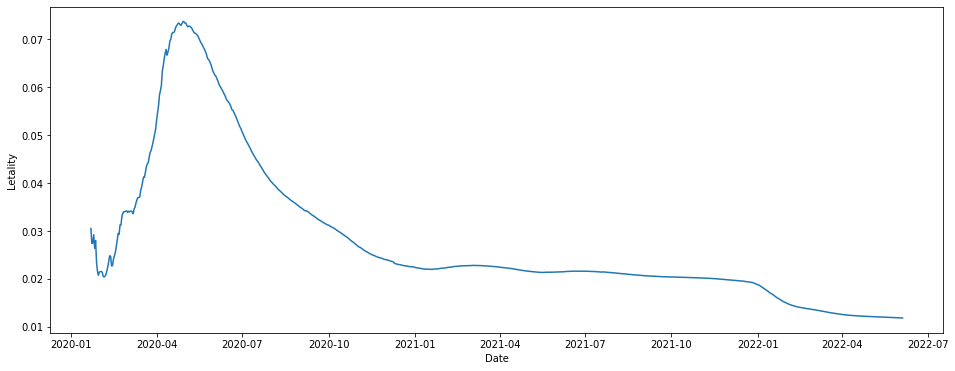

In [279]:
import seaborn as sns

fig = plt.figure(figsize = (16,6))

sns.lineplot(x = 'Date', y = 'Letality', data = evol)

It seems that, as the disease evolved, the letality decreased, as we learned how to control the disease.

Now, we will plot the incidence and the mortality:

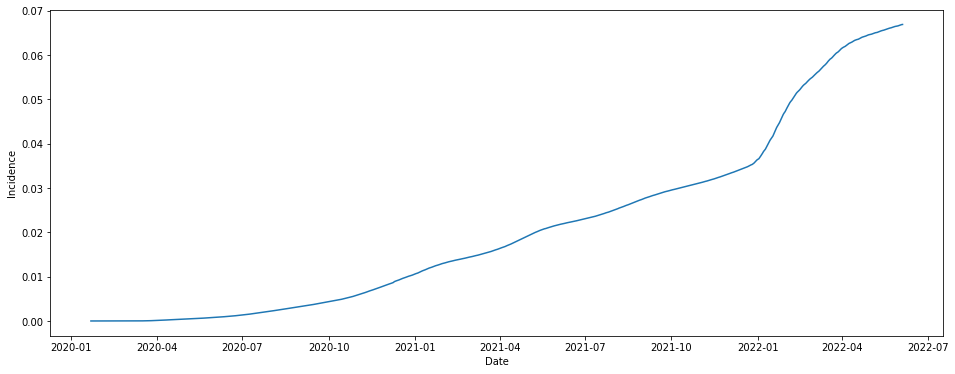

In [280]:
fig = plt.figure(figsize = (16,6))

sns.lineplot(x = 'Date', y = 'Incidence', data = evol)

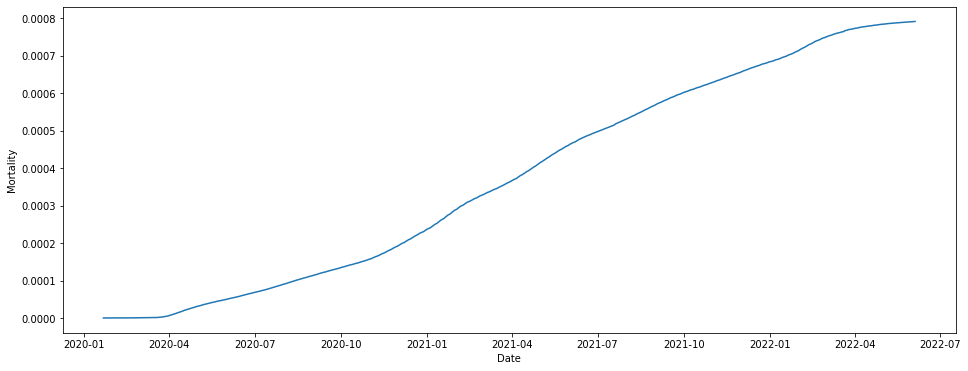

In [281]:
fig = plt.figure(figsize = (16,6))

sns.lineplot(x = 'Date', y = 'Mortality', data = evol)

Now, since these are being drawn in a cumulative sense, it is impossible for then to decrease. However, they seem to be reaching a plateau. That means that, as we further understand the disease and develop new treatments and vaccines, we are making the disease less dangerous!